<a href="https://colab.research.google.com/github/yudhead/Mesin-Learning/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import math
import os
import glob
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im

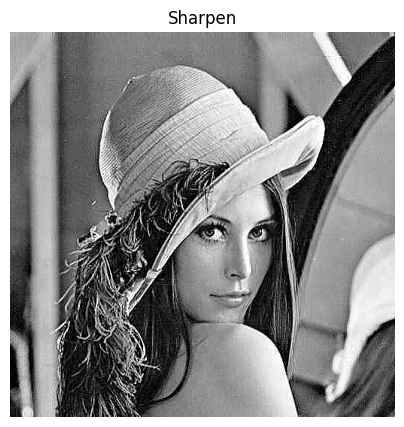

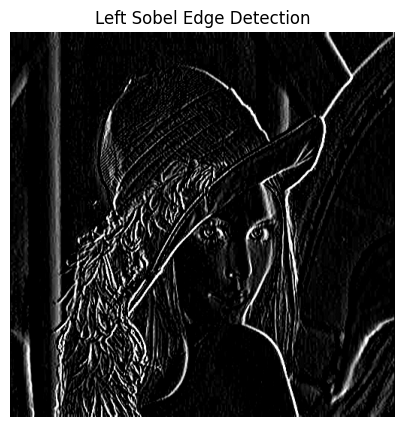

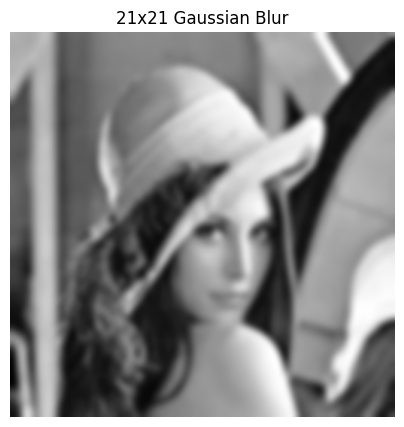

In [ ]:
def convolution2d(Image, kernel, stride, padding):
   pass

img = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')
if img is not None:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    print("Error: Could not load image.")

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

if 'img_gray' in locals():
    convolution2d(img_gray, kernel_sharpen, 1, 2)
else:
    print("Error: img_gray is not defined.")


convolution2d(img_gray, kernel_sharpen, 1, 2)


def show_image_with_filter(image, title):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
image = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg', cv2.IMREAD_GRAYSCALE)
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
emboss_kernel = np.array([[-2, -1,  0],
                          [-1,  1,  1],
                          [ 0,  1,  2]])
sobel_kernel = np.array([[ 1,  0, -1],
                         [ 2,  0, -2],
                         [ 1,  0, -1]])
canny_kernel = np.array([[-1, -1, -1],
                           [ -1,  8,  -1],
                           [ -1,  -1,  -1]])
gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1,  4,  6,  4, 1]]) / 256
def generate_gaussian_kernel_21x21():
    kernel_size = 21
    sigma = math.sqrt(kernel_size)
    gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
    gauss_kernel = gaussian_kernel @ gaussian_kernel.T
    return gauss_kernel
gaussian_kernel_21 = generate_gaussian_kernel_21x21()
sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
show_image_with_filter(sharpened_image, 'Sharpen')
embossed_image = cv2.filter2D(image, -1, emboss_kernel)
show_image_with_filter(embossed_image, 'Emboss')
sobel_image = cv2.filter2D(image, -1, sobel_kernel)
show_image_with_filter(sobel_image, 'Left Sobel Edge Detection')
prewitt_image = cv2.filter2D(image, -1, canny_kernel)
show_image_with_filter(prewitt_image, 'canny Edge Detection')
gaussian_blur_21x21 = cv2.filter2D(image, -1, gaussian_kernel_21)
show_image_with_filter(gaussian_blur_21x21, '21x21 Gaussian Blur')

In [ ]:
def show_side_by_side(images, titles, figsize=(15,5)):
  plt.figure(figsize=figsize)
  for i, (img, title) in enumerate(zip(images, titles)):
    if len(img.shape) == 2:
      plt.subplot(1, len(images), i+1)
      plt.imshow(img, cmap='gray')
    else:
      plt.subplot(1, len(images), i+1)
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
  plt.show()
img = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur= cv2.GaussianBlur(img,(7,7),1)
edges= cv2.Canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),100,200)
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened,edges, ], ['Original', 'Blur', 'Sharpened', 'Edges'])

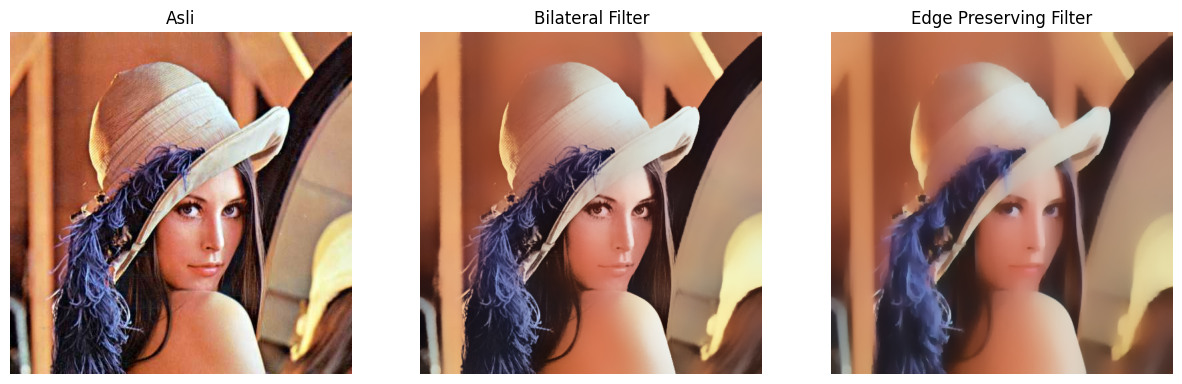

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap='gray')
        else:
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

img = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')

bilateral = cv2.bilateralFilter(img, 50, 100, 100)


edge_preserve = cv2.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side(
    [img, bilateral, edge_preserve],
    ["Asli", "Bilateral Filter", "Edge Preserving Filter"]
)


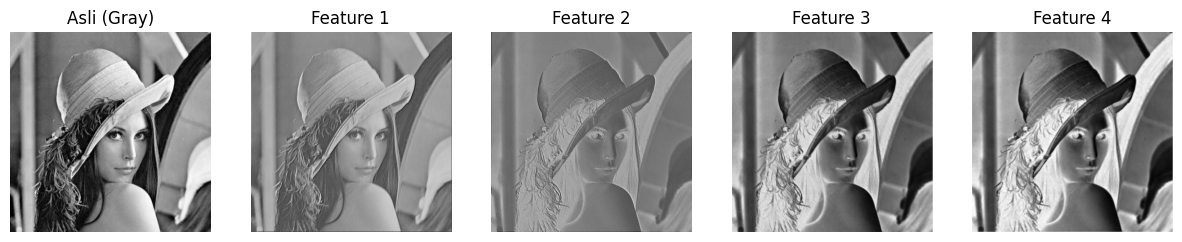

In [12]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

with torch.no_grad():
    features = model(img_tensor)

feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_side_by_side(
    [img_gray] + feature_maps,
    ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))]
)


In [14]:
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

img = cv2.imread('/content/drive/MyDrive/PCVK/lena.jpg')

smooth = cv2.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

gaussian = cv2.GaussianBlur(smooth, (0,0), 3)
sharpened = cv2.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

alpha = 1.2
beta = 15
beauty = cv2.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])

sepia = cv2.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

rows, cols = img.shape[:2]
kernel_x = cv2.getGaussianKernel(cols, int(cols*0.6))
kernel_y = cv2.getGaussianKernel(rows, int(rows*0.6))
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

show_side_by_side(
    [img, beauty, old_img],
    ["Asli", "Beauty Filter", "Old/Vintage Filter"]
)


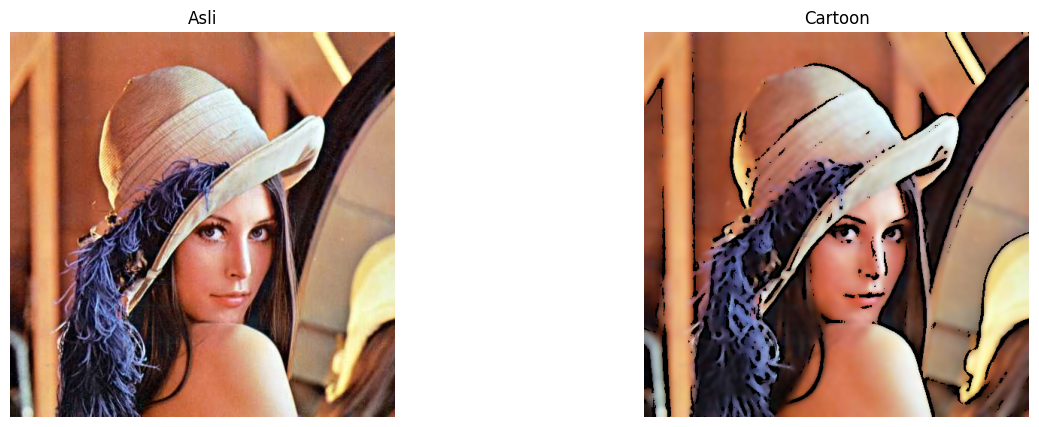

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur =cv2.medianBlur(gray, 7)
edges = cv2.adaptiveThreshold(gray_blur, 255,
                            cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 9, 9)
color =cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

cartoon = cv2.bitwise_and(color, color, mask=edges)
show_side_by_side([img, cartoon], ["Asli", "Cartoon"])

In [17]:
img = cv2.imread('/content/drive/MyDrive/PCVK/djawatan.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

night = cv2.convertScaleAbs(img, alpha=0.6, beta=-40)

blue_tint = np.full_like(night,(50, 0, 100))
night = cv2.addWeighted(night, 0.8, blue_tint, 0.2, 0)

kernel = np.ones((15,15), np.float32) / 255
glow = cv2.filter2D(night, -1, kernel)

night_glow = cv2.addWeighted(night, 0.7, glow, 0.3, 0)

show_side_by_side([img, night, night_glow], ["Asli", "Night filter", "night + Glow (filter 2D)"])

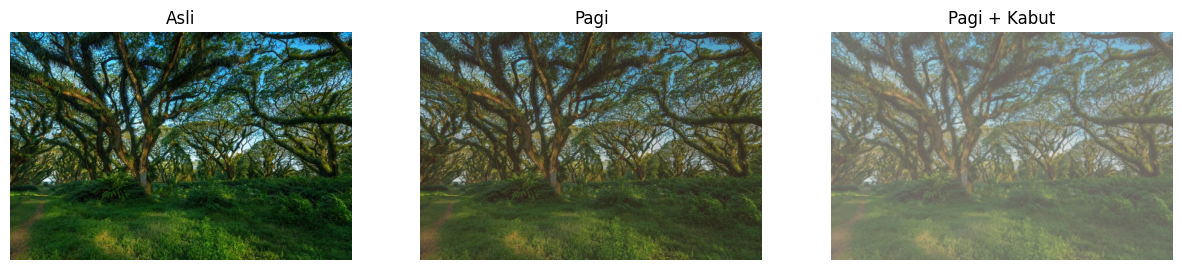

In [19]:
img = cv2.imread('/content/drive/MyDrive/PCVK/djawatan.jpg')

alpha = 0.9
beta = 20
soft = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

warm_tint = np.full_like(soft, (40, 70, 120))  # BGR
pagi = cv2.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

kernel = cv2.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T
kabut = cv2.filter2D(pagi, -1, kernel)

white_layer = np.full_like(pagi, 255)
kabut = cv2.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

def show_side_by_side(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (im, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

show_side_by_side([img, pagi, kabut], ["Asli", "Pagi", "Pagi + Kabut"])
